In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)
import re

Populating the interactive namespace from numpy and matplotlib


In [20]:
with open("normal_exp_bsize4096", 'rb') as normal_out:
    steps_normal = []
    prec_1_normal = []
    for line in normal_out.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Testset Performance: Cur Step:(.*) Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                cur_step, prec_top_1, prec_top_5 = int(search_sth.group(1)), float(search_sth.group(2)), float(search_sth.group(3))
                steps_normal.append(cur_step)
                prec_1_normal.append(prec_top_1)

with open("25p_gather", 'rb') as normal_out:
    steps_25p = []
    prec_1_25p = []
    for line in normal_out.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Testset Performance: Cur Step:(.*) Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                cur_step, prec_top_1, prec_top_5 = int(search_sth.group(1)), float(search_sth.group(2)), float(search_sth.group(3))
                steps_25p.append(cur_step)
                prec_1_25p.append(prec_top_1)
                
with open("50p_gather", 'rb') as normal_out:
    steps_50p = []
    prec_1_50p = []
    for line in normal_out.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Testset Performance: Cur Step:(.*) Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                cur_step, prec_top_1, prec_top_5 = int(search_sth.group(1)), float(search_sth.group(2)), float(search_sth.group(3))
                steps_50p.append(cur_step)
                prec_1_50p.append(prec_top_1)

# Convergence Performance on LeNet with Batch Size 4096

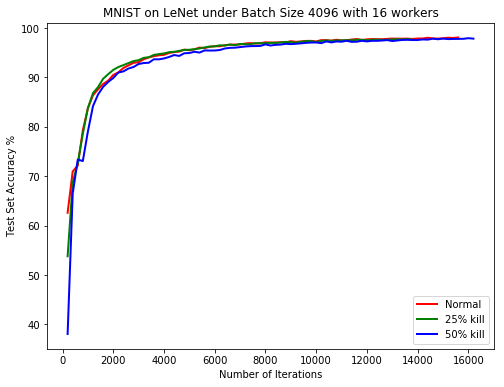

In [27]:
fig = plt.figure(1)
plt.plot(steps_normal, prec_1_normal, '-r', label="Normal", linewidth='2.0')
plt.plot(steps_25p, prec_1_25p, '-g', label="25% kill", linewidth='2.0')
plt.plot(steps_50p, prec_1_50p, '-b', label="50% kill", linewidth='2.0')
plt.xlabel("Number of Iterations")
plt.ylabel("Test Set Accuracy %")
plt.title("MNIST on LeNet under Batch Size 4096 with 16 workers")
plt.legend()
plt.show()

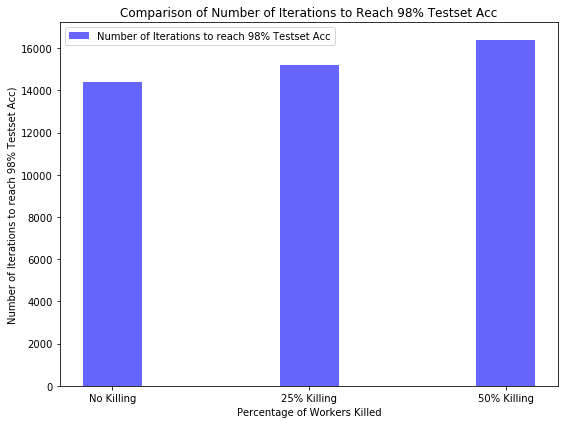

In [32]:
n_groups = 3

num_iter = (14400, 15200, 16400)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index+bar_width/2.0, num_iter, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Number of Iterations to reach 98% Testset Acc')

plt.xlabel('Percentage of Workers Killed')
plt.ylabel('Number of Iterations to reach 98% Testset Acc)')
plt.title('Comparison of Number of Iterations to Reach 98% Testset Acc')
plt.xticks(index + bar_width / 2, ('No Killing', '25% Killing', '50% Killing'))
plt.legend()

plt.tight_layout()
plt.show()

# Convergence Performance on ResNet-18 with Batch Size 1024

In [13]:
# parse the normal output first
pre_defined_worker=8
test_performance_normal = []
test_performance_50p = []
test_performance_25p = []
tmp_test_performance =[]
with open("normal_exp_resnet_bsize1024", 'rb') as normal_out:
    steps_normal = []
    prec_1_normal = []
    worker_counter_ = 0
    step_counter = 1
    for line in normal_out.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                prec_top_1, prec_top_5 = float(search_sth.group(2)), float(search_sth.group(3))
                tmp_test_performance.append(prec_top_1)
                worker_counter_ += 1
                if worker_counter_ == pre_defined_worker:
                    worker_counter_ = 0
                    test_performance_normal.append(sum(tmp_test_performance)/len(tmp_test_performance))
                    tmp_test_performance = []

tmp_test_performance =[]
with open("50p_gather_resnet", 'rb') as normal_out:
    steps_normal = []
    prec_1_normal = []
    worker_counter_ = 0
    step_counter = 1
    for line in normal_out.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                prec_top_1, prec_top_5 = float(search_sth.group(2)), float(search_sth.group(3))
                tmp_test_performance.append(prec_top_1)
                worker_counter_ += 1
                if worker_counter_ == pre_defined_worker:
                    worker_counter_ = 0
                    test_performance_50p.append(sum(tmp_test_performance)/len(tmp_test_performance))
                    tmp_test_performance = []

tmp_test_performance =[]
with open("25p_gather_resnet", 'rb') as normal_out:
    steps_normal = []
    prec_1_normal = []
    worker_counter_ = 0
    step_counter = 1
    for line in normal_out.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                prec_top_1, prec_top_5 = float(search_sth.group(2)), float(search_sth.group(3))
                tmp_test_performance.append(prec_top_1)
                worker_counter_ += 1
                if worker_counter_ == pre_defined_worker:
                    worker_counter_ = 0
                    test_performance_25p.append(sum(tmp_test_performance)/len(tmp_test_performance))
                    tmp_test_performance = []

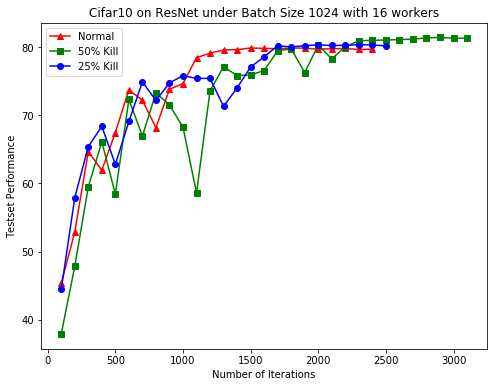

In [17]:
fig = plt.figure()
plt.plot([100*i for i in range(1,len(test_performance_normal)+1)], test_performance_normal, '-^r', label='Normal')
plt.plot([100*i for i in range(1,len(test_performance_50p)+1)], test_performance_50p, '-sg', label='50% Kill')
plt.plot([100*i for i in range(1,len(test_performance_25p)+1)], test_performance_25p, '-ob', label='25% Kill')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Testset Performance')
plt.title("Cifar10 on ResNet under Batch Size 1024 with 16 workers")
plt.show()